# `pathfinder`

The `pathfinder` algorithm uses a steepest ascent algorithm to group pixels.  For any given pixel, the algorithm checks the surrounding pixels for the maximum value; the current pixel and the pixel with the maximum value are grouped.  Then this is then repeated for the pixel with the maximum value.  It stops when the current pixel is the local maximum in the neighborhood.


In [1]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Wed Jan 23 08:26:48 EST 2019


In [2]:
source display_map.sh

In [3]:
#/bin/rm -rf ./tmp
#mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

### Example

In [4]:
pathfinder img.psf_asm outfile=pathfinder.map minval=0.2 clob+

pathfinder
          infile = img.psf_asm
         outfile = pathfinder.map
          minval = 0.2
       direction = diagonal
        debugreg = 
         verbose = 1
         clobber = yes
            mode = ql



In [5]:
# Unlike the other tools, `pathfinder` doesn't create the binned image
dmmaskbin img.fits pathfinder.map pathfinder.img clob+

In [6]:
### map2reg pathfinder.map pathfinder.reg

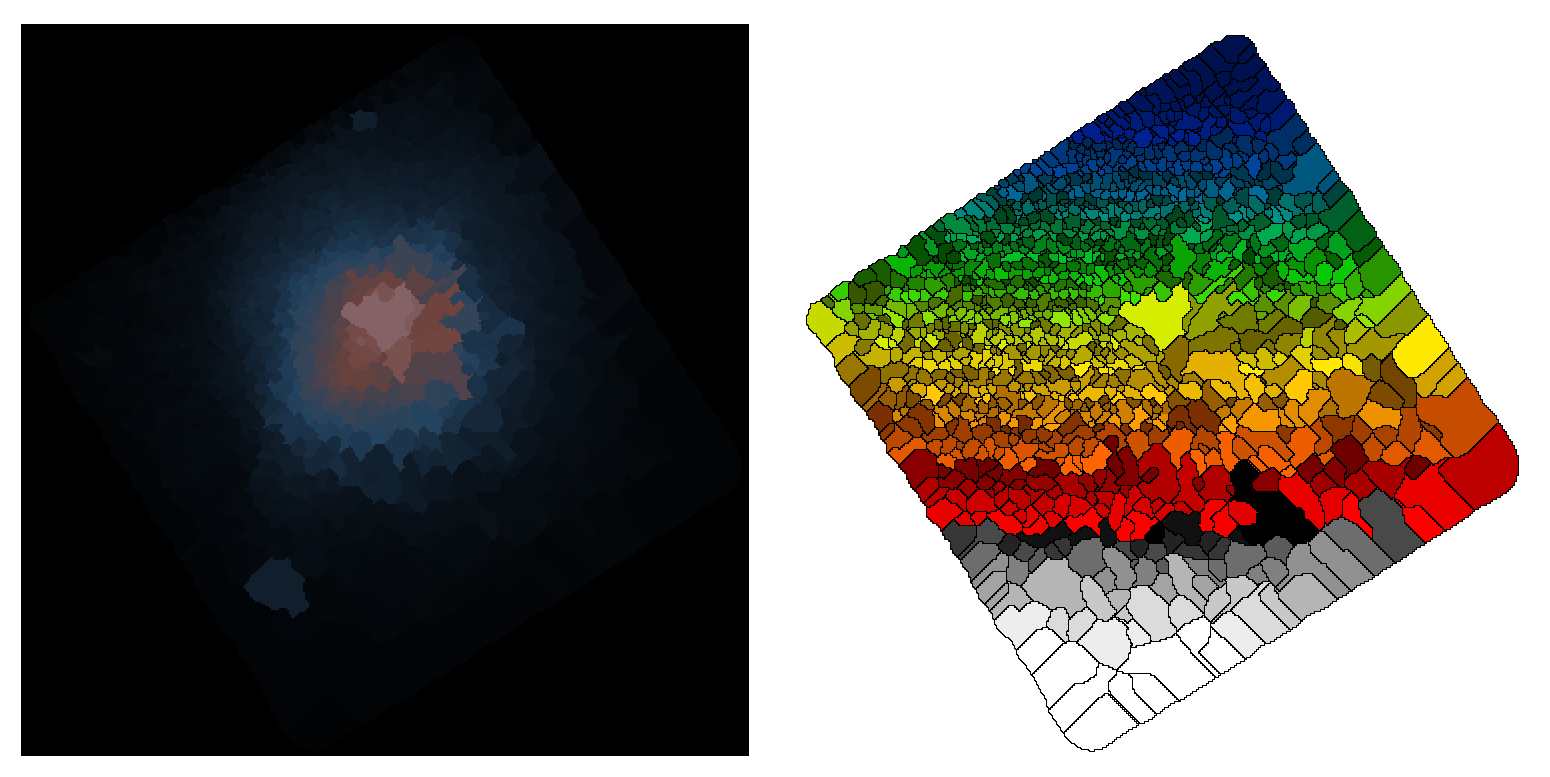

In [7]:
display_map pathfinder.img pathfinder.map pathfinder.png pathfinder.reg

This algorithm is similar to `grow_from_max`, except instead of relying on the distance from a pixel to the local-max, it relies on the gradient to the local maximum.  This allows say two point sources to separate at the saddle point between them rather than at a fixed distance.

Again, this works best when the input image has been smoothed such that the local max and gradients are meaningful.